# Basic Data Analysis and Model Building using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pima_df = pd.read_csv('diabetes.csv')
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima_df.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
pima_df.rename(columns = {
    'Pregnancies' : 'Preg',
    'BloodPressure' : 'BP',
    'SkinThickness' : 'Skin',
    'DiabetesPedigreeFunction' : 'DPF',
    'Outcome' : 'Class'}, inplace = True)

pima_df.head()

,Preg,Glucose,BP,Skin,Insulin,BMI,DPF,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima_df.shape

(768, 9)

In [7]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Preg     768 non-null    int64  
 1   Glucose  768 non-null    int64  
 2   BP       768 non-null    int64  
 3   Skin     768 non-null    int64  
 4   Insulin  768 non-null    int64  
 5   BMI      768 non-null    float64
 6   DPF      768 non-null    float64
 7   Age      768 non-null    int64  
 8   Class    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
bmi_df = pima_df['BMI']
bmi_df.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

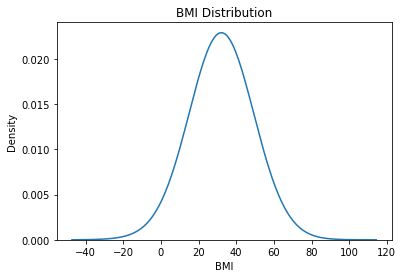

In [9]:
sns.kdeplot(bmi_df, bw_method = 2)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Distribution')
plt.show()

In [10]:
pima_df['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

In [11]:
#Library From Resampling 
from sklearn.utils import resample

In [12]:
df_majority = pima_df[pima_df.Class == 0]
df_minority = pima_df[pima_df.Class == 1]

In [13]:
# Upsampling the minority class
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 500, random_state = 123)
# Combine majority and upsampled minority classes
pima_df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
pima_df_upsampled.Class.value_counts()

0    500
1    500
Name: Class, dtype: int64

In [17]:
# Downsampling the majority class
df_majority_downsampled = resample(df_majority, replace = True, n_samples = 268, random_state = 123)
# Combine minority and downsampled majority classes
pima_df_downsampled = pd.concat([df_minority, df_majority_downsampled])
# Display new class counts
pima_df_downsampled.Class.value_counts()

0    268
1    268
Name: Class, dtype: int64

In [18]:
# Function to plot class distribution 
def visualize_classes(df_name):
    labels, counts = np.unique(df_name['Class'], return_counts = True)
    colors = ['r','b']
    plt.figure(figsize = (8,8))
    plt.bar(labels, counts, color = colors)
    plt.gca().set_xticks(labels)
    plt.xlabel('Class', fontsize = 15)
    plt.ylabel('Class', fontsize = 15)
    plt.title('Class Distribution')
    plt.show()

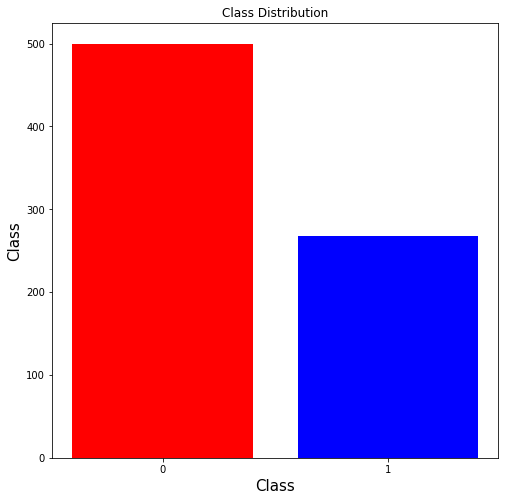

In [19]:
visualize_classes(pima_df)

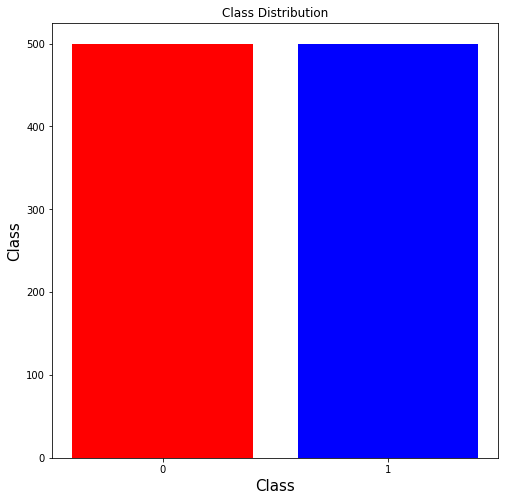

In [20]:
visualize_classes(pima_df_upsampled)

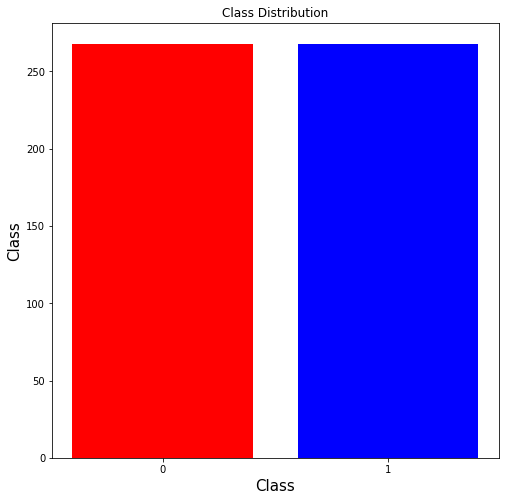

In [21]:
visualize_classes(pima_df_downsampled)

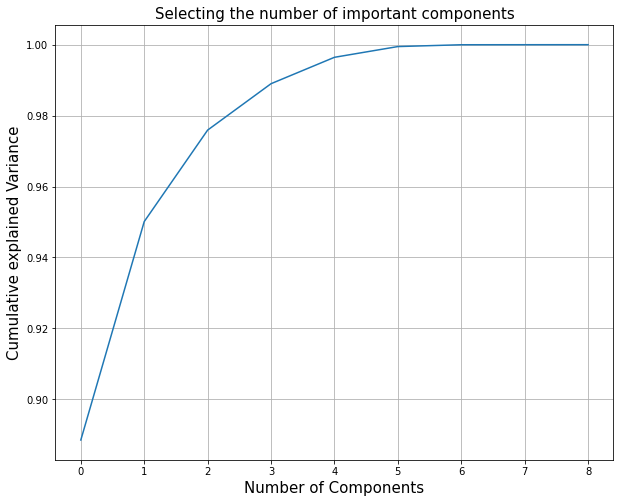

In [22]:
from sklearn.decomposition import PCA
pca = PCA().fit(pima_df)
plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Cumulative explained Variance', fontsize = 15)
plt.title('Selecting the number of important components', fontsize = 15)
plt.grid()
plt.show()

In [24]:
# Separate Data into Features and Labels/Targets
features = pima_df_upsampled.drop('Class', 1)
labels = pima_df_upsampled['Class']

features.describe()

,Preg,Glucose,BP,Skin,Insulin,BMI,DPF,Age
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.125000,125.106000,69.28000,21.350000,86.185000,32.586200,0.487257,33.814000
std,3.494794,32.606195,19.32483,16.350683,119.805209,7.641129,0.332818,11.390133
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,102.000000,64.00000,0.000000,0.000000,27.800000,0.248000,25.000000
50%,3.000000,122.000000,72.00000,24.000000,44.000000,32.800000,0.395000,30.000000
75%,6.000000,146.250000,80.00000,33.000000,135.000000,36.800000,0.654250,41.250000
max,17.000000,199.000000,122.00000,99.000000,846.000000,67.100000,2.329000,81.000000


In [25]:
labels.describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Class, dtype: float64

In [26]:
# Split Data
from sklearn.model_selection import train_test_split

In [28]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, Binarizer

In [ ]:
# Standard Scaler
scale_features_std = StandardScaler()